In [1]:
from google.colab import files
up = files.upload()

Saving df_movies_api.csv to df_movies_api.csv


Importamos librerias con las que se realziará el EDA

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('df_movies_api.csv')

<ipython-input-4-7497eef8cbea>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_movies_api.csv')


In [6]:
df.head(3)

,index,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,return,release_year,release_month,release_day
0,1,30000000,862,en,Led by Woody. Andy's toys live happily in his ...,21.946943,30/10/1995,373554033,81.0,Released,NaN,Toy Story,7.7,5415.0,12.451801,1995,Octubre,Martes
1,2,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,15/12/1995,262797249,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,4.043035,1995,Diciembre,Sabado
2,3,0,15602,en,A family wedding reignites the ancient feud be...,11.7129,22/12/1995,0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,0.000000,1995,Diciembre,Sabado


En esta sección se trabajara el EDA.

In [9]:
df.info() # Observamos algunas variables no tienen el formato correcto. como budget, popularity.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45298 entries, 0 to 45297
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              45298 non-null  int64  
 1   budget             45298 non-null  object 
 2   id                 45298 non-null  object 
 3   original_language  45289 non-null  object 
 4   overview           44358 non-null  object 
 5   popularity         45296 non-null  object 
 6   release_date       45298 non-null  object 
 7   revenue            45298 non-null  int64  
 8   runtime            45049 non-null  float64
 9   status             45215 non-null  object 
 10  tagline            20397 non-null  object 
 11  title              45295 non-null  object 
 12  vote_average       45295 non-null  float64
 13  vote_count         45295 non-null  float64
 14  return             45298 non-null  float64
 15  release_year       45298 non-null  int64  
 16  release_month      452

Convertimos las varibles budget y popularity a int y float

In [30]:
df['popularity'] = df['popularity'].astype('float64')

In [37]:
df['budget'] = df['budget'].astype('int64')

Se encuentra que en las columnas habían strings, se rastrean y eliminan del dataframe.

In [26]:
df[df['popularity']=='Beware Of Frost Bites']

,index,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,return,release_year,release_month,release_day
35512,35514,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,01/01/2014,82,Released,Beware Of Frost Bites,22,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1900,Enero,Lunes


In [35]:
df[df['budget']== '/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg']

,index,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,return,release_year,release_month,release_day
29458,29460,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,29/09/2012,68,Released,NaN,12,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1900,Enero,Viernes


In [28]:
df.drop(35512,inplace=True)

In [36]:
df.drop(29458,inplace=True)

Realizamos un analisis del retorno de las peliculas agrupando por mes y día de lanzamiento.

In [38]:
analisis_retorno = df[['id','revenue','return','release_year','release_month','release_day']].drop_duplicates()

In [ ]:
retorno_mes =analisis_retorno.groupby('release_month').mean()['return'].reset_index().sort_values('return',ascending=False)

Text(0.5, 1.0, 'Retorno promedio por mes de lanzamiento pelicula')

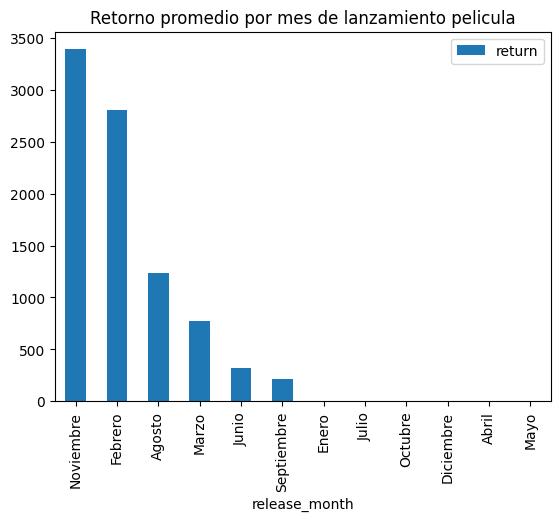

In [17]:
retorno_mes.plot(x='release_month',y='return',kind='bar')
plt.title('Retorno promedio por mes de lanzamiento pelicula')

Se observa que el mes de lanzamiento con mayor return promedio es Noviembre

In [ ]:
retorno_dia=analisis_retorno.groupby('release_day').mean()['return'].reset_index().sort_values('return',ascending=False)

Text(0.5, 1.0, 'Retorno promedio por día de lanzamiento pelicula')

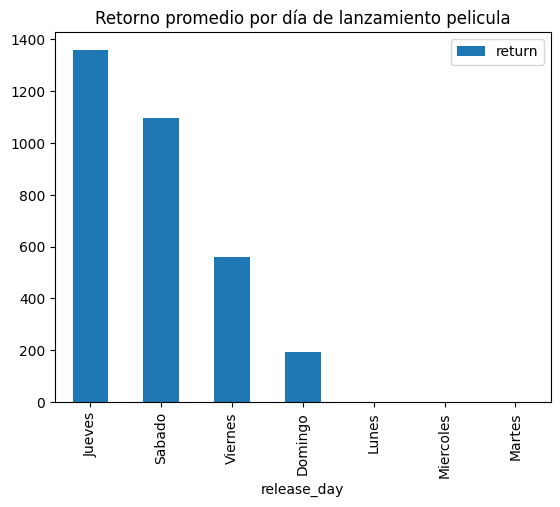

In [19]:
retorno_dia.plot(x='release_day',y='return',kind='bar')
plt.title('Retorno promedio por día de lanzamiento pelicula')

Se observa que el día de lanzamiento con mayor return promedio es Jueves, quizas escoger un jueves de noviembre para el lanzamiento de una pelicula,pueda generar mayor retorno.

Analizaremos si existe correlación entre las variables numericas del data frame, usamos heatmap para ello.

In [39]:
correlacion = df[['revenue','return','budget','popularity','vote_average','vote_count']] # traemos variables numericas

In [42]:
corr =np.corrcoef(correlacion.T) # generamos matriz de coeficiente de correlacion entre variables.

<Axes: >

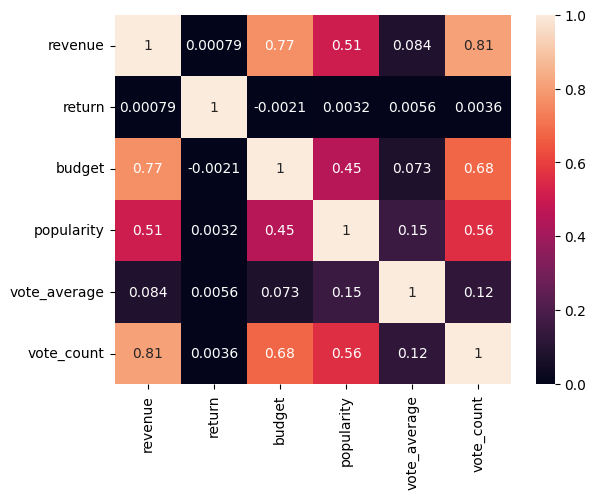

In [44]:
sns.heatmap(corr,annot=True,xticklabels=correlacion.columns, yticklabels=correlacion.columns)

Se observa una alta correlación entre las variables vote_count y revenue. Se esperaba relación entre budget y return, sin embargo, no se observa relación lineal entre las variables.

Analizamos los actores para ello traemos el data frame de actores

In [46]:
from google.colab import files
up = files.upload()

Saving df_actor.xlsx to df_actor.xlsx


In [47]:
df_actor = pd.read_excel('df_actor.xlsx')

Unimos dataframe de actor con dataframe de movies y traemos solo id, budget, return

In [49]:
df_actor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552101 entries, 0 to 552100
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   castdos  552101 non-null  object 
 1   id       552101 non-null  int64  
 2   return   551967 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.6+ MB


In [51]:
df['id']= df['id'].astype('int64') #convertimos id de df a int 64 para poder hacer el merge

In [74]:
df_ac_movies =df_actor.merge(df[['id','budget','revenue']],on='id')

Traemos solo valores no cero para poder realizar el analisis de retorno y budget promedio

In [75]:
bud_no_cero =df_ac_movies[df_ac_movies['budget']!=0]

In [76]:
retur_n_cero =bud_no_cero[bud_no_cero['return']!=0]

In [79]:
rev_n_cero =retur_n_cero[retur_n_cero['revenue']!=0]

Agrupamos por actor y generamos el promedio para budget, return y revenue

In [84]:
todos__mean=rev_n_cero.groupby('castdos').mean().reset_index()

Analizamos relacion budget, return

Text(0.5, 1.0, 'relacion retorno, budget por actor')

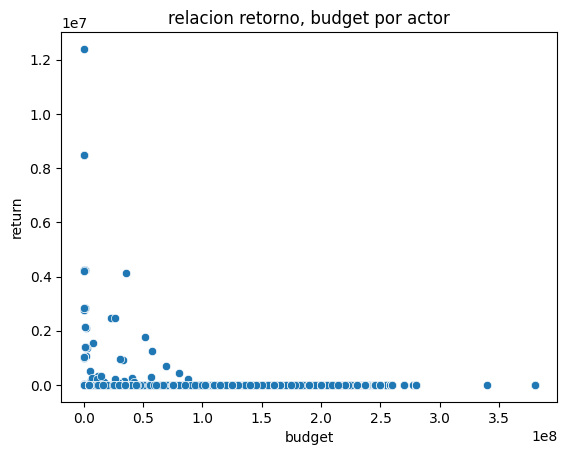

In [87]:
sns.scatterplot(data=todos__mean,x ='budget',y='return')
plt.title('relacion retorno, budget por actor')

Text(0.5, 1.0, 'relacion budget-revenue por actor')

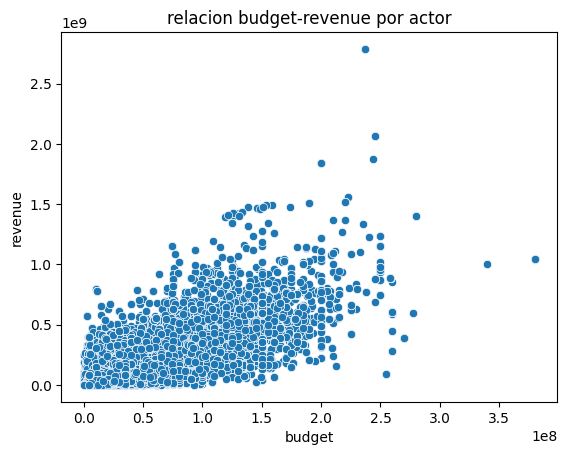

In [89]:
sns.scatterplot(data=todos__mean,x ='budget',y='revenue')
plt.title('relacion budget-revenue por actor')

Se observa una relación directa lineal entre las variables budget y revenue.

Recomendación de peliculas.



Dado que la api en render arroja error por capacidad, se opta por tomar una muestra de 500 registros, aquí se genera el dataframe que consumira la API para la función de recomendación.

Sleccionamos los primeros 500 registros ordenados por vote_average

In [ ]:
vote_average_ordenado =df.sort_values(by='vote_average',ascending=False).reset_index()

In [ ]:
primeros_qui= vote_average_ordenado.loc[0:500]

In [ ]:
df_recomendacion=primeros_qui[['title','vote_average','overview']].dropna().reset_index(drop=True)

In [ ]:
import string

Eliminamos caracteres de puntuación, comillas entre otros a través para la columna overview con la libreria string

In [ ]:
df_recomendacion['noverviwe'] = df_recomendacion['overview'].str.replace('[{}]'.format(string.punctuation),'')

<ipython-input-151-a9457d04637f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_recomendacion['noverviwe'] = df_recomendacion['overview'].str.replace('[{}]'.format(string.punctuation),'')


In [ ]:
df_recomendacion.to_csv('df_recomendacion.csv') # exportamos df que será consumido por la api

Importamos librerias de sklearn para realizar sistema de recomendación, usaremos la columna overview como input y title como output, se usara la similaridad coseno.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')#permite tokenizar doctos, y los pondera
tfidf_matrix =tfidf.fit_transform(df_recomendacion['noverviwe'])


In [ ]:

from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [ ]:
indices = pd.Series(df_recomendacion.index, index=df_recomendacion['title'])# se genera una lista para los titulos, sera usado en la funcion
#para que nos traiga las 5 primeras peliculas

In [ ]:
def recomendacion(title):
  idx= indices[title]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores=sorted(sim_scores,key=lambda x: x[1],reverse =True)
  sim_scores = sim_scores[1:6]
  movie_indices = [i[0] for i in sim_scores]
  respuesta = list(df_recomendacion['title'].iloc[movie_indices])
  return {'resp':respuesta}

In [ ]:
recomendacion('The Lion of Thebes')

{'resp': ['Rick and Morty: State of Georgia Vs. Denver Fenton Allen',
  'The Loves of Pharaoh',
  'Willow and Wind',
  'Long Strange Trip',
  'Hostages']}